**0105-ADV-ML-II-Dimensionality-reduction-weekly-project**

This project aims to explore and apply feature Engineering and dimensionality reduction techniques on second-hand car sales datasets. The goal is to prepare the dataset for machine learning models by creating informative features and reducing the feature space while retaining essential information.

The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise.

Load neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load and read the dataset

In [2]:
sec_hand_cars = pd.read_csv("/content/second_hand_cars.csv")
sec_hand_cars.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


Exploratory Data Analysis

In [3]:
sec_hand_cars.shape

(2500, 16)

In [4]:
sec_hand_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [5]:
sec_hand_cars.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories'],
      dtype='object')

Exploring the dataset

In [13]:
# define and countining the number of numerical & categorical columns/ variables
numeric_features = [feature for feature in sec_hand_cars.columns if sec_hand_cars[feature].dtype != 'O']
categorical_features = [feature for feature in sec_hand_cars.columns if sec_hand_cars[feature].dtype == 'O']

# print columns
print('This dataset have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nThere are {} categorical features : {}'.format(len(categorical_features), categorical_features))

This dataset have 3 numerical features : ['Make Year', 'Mileage', 'Price']

There are 13 categorical features : ['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition', 'Owner Type', 'Registration Number', 'Transmission Type', 'Body Color', 'Service Record', 'Insurance', 'Registration Certificate', 'Accessories']


In [12]:
sec_hand_cars.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [11]:
sec_hand_cars.isnull().sum()

,0
Company Name,0
Car Name,0
Variant,0
Fuel Type,0
Tyre Condition,0
Make Year,0
Owner Type,0
Registration Number,0
Mileage,0
Price,0


In [10]:
# Handle missing values (replace with median for numerical, mode for categorical)
for column in sec_hand_cars.columns:
  if sec_hand_cars[column].dtype == 'object':
    sec_hand_cars[column].fillna(sec_hand_cars[column].mode()[0], inplace=True)
  else:
    sec_hand_cars[column].fillna(sec_hand_cars[column].median(), inplace=True)

In [18]:
sec_hand_cars.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [9]:
sec_hand_cars.duplicated().sum()

np.int64(0)

In [19]:
sec_hand_cars.drop_duplicates(inplace=True)

In [8]:
sec_hand_cars.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [10]:
sec_hand_cars.nunique()

,0
Company Name,10
Car Name,10
Variant,9
Fuel Type,3
Tyre Condition,3
Make Year,10
Owner Type,3
Registration Number,2500
Mileage,2483
Price,2495


In [11]:
sec_hand_cars.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories'],
      dtype='object')

Feature Information and Target Variables

Feature details

1. Company Name – The manufacturer/brand of the car (e.g., Maruti Suzuki, Hyundai, Toyota).

2. Car Name – The model of the car (e.g., Swift, Creta, Innova).

3. Variant – The specific trim level (e.g., VXi, ZDi, top-end, base model).

4. Fuel Type – Type of fuel the car uses (Petrol, Diesel, CNG, Electric, Hybrid).

5. Tyre Condition – The state of the tyres (New, Good, Needs Replacement).

6. Make Year – The manufacturing year of the car (e.g., 2018, 2020).

7. Owner Type – Number of previous owners (First, Second, Third, etc.).

8. Registration Number – The vehicle’s unique identification number (e.g., DL01AB1234).

9. Mileage – Distance driven (in km or miles), indicating wear and tear.

10. Price – The selling price of the second-hand car (in local currency).

11. Transmission Type – Gear system (Manual, Automatic, AMT, CVT).

12. Body Color – Exterior color of the car (e.g., Red, White, Black).

13. Service Record – Maintenance history (Fully maintained, Partial, No records).

14. Insurance – Insurance status (Valid, Expired, Comprehensive/Third-party).

15. Registration Certificate (RC) – Legal status (Original, Duplicate, NOC if transferred).
16. Accessories – Additional fittings (Alloy wheels, Music system, Sunroof, etc.).

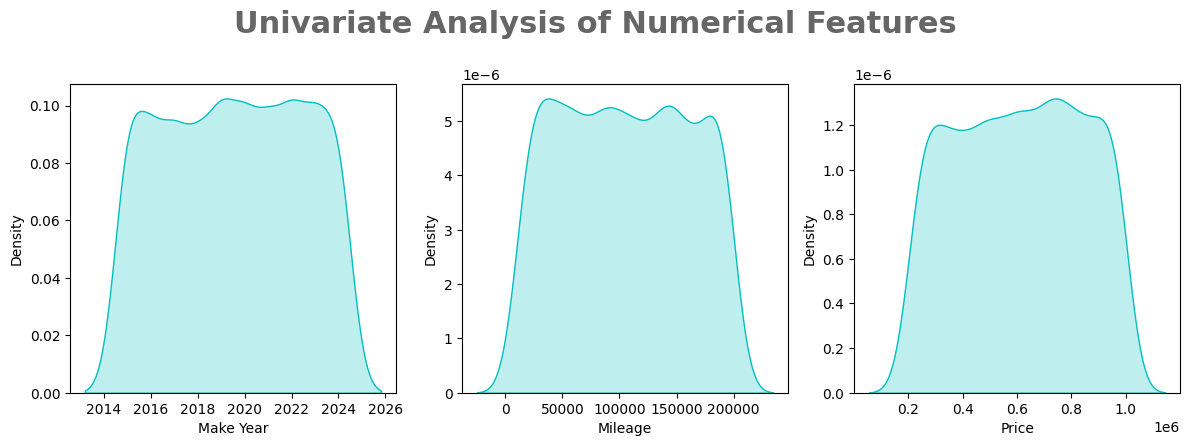

In [23]:
plt.figure(figsize=(12, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=22, fontweight='bold', alpha=0.6, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=sec_hand_cars[numeric_features[i]],shade=True, color='c')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

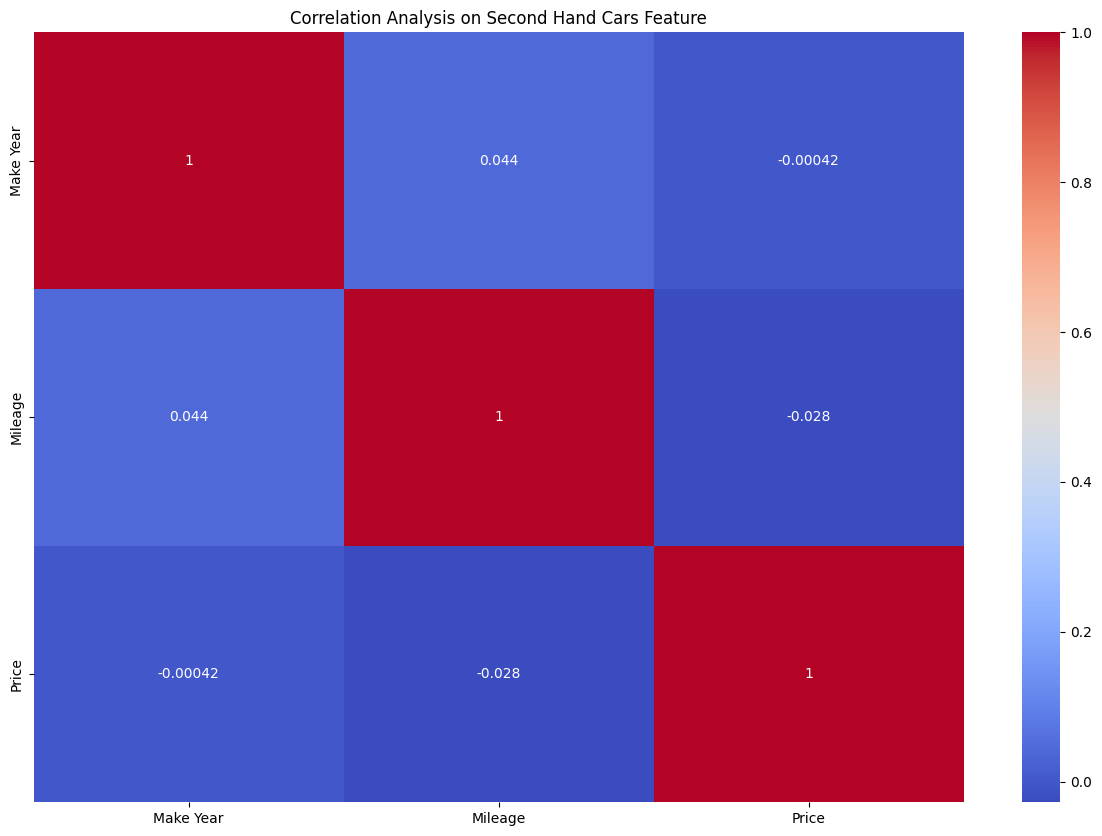

In [36]:
plt.figure(figsize = (15,10))
# This is first to select only numerical features for correlation analysis
numerical_features = sec_hand_cars.select_dtypes(include=np.number).columns
correlation_matrix = sec_hand_cars[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis on Second Hand Cars Feature')
plt.show()

From this correlationship analsis, there seems no strong correlations exist between Make Year, Mileage, and Price in this dataset. The price seems largely unaffected by either manufacturing year or mileage.

In [25]:
sec_hand_cars.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories'],
      dtype='object')

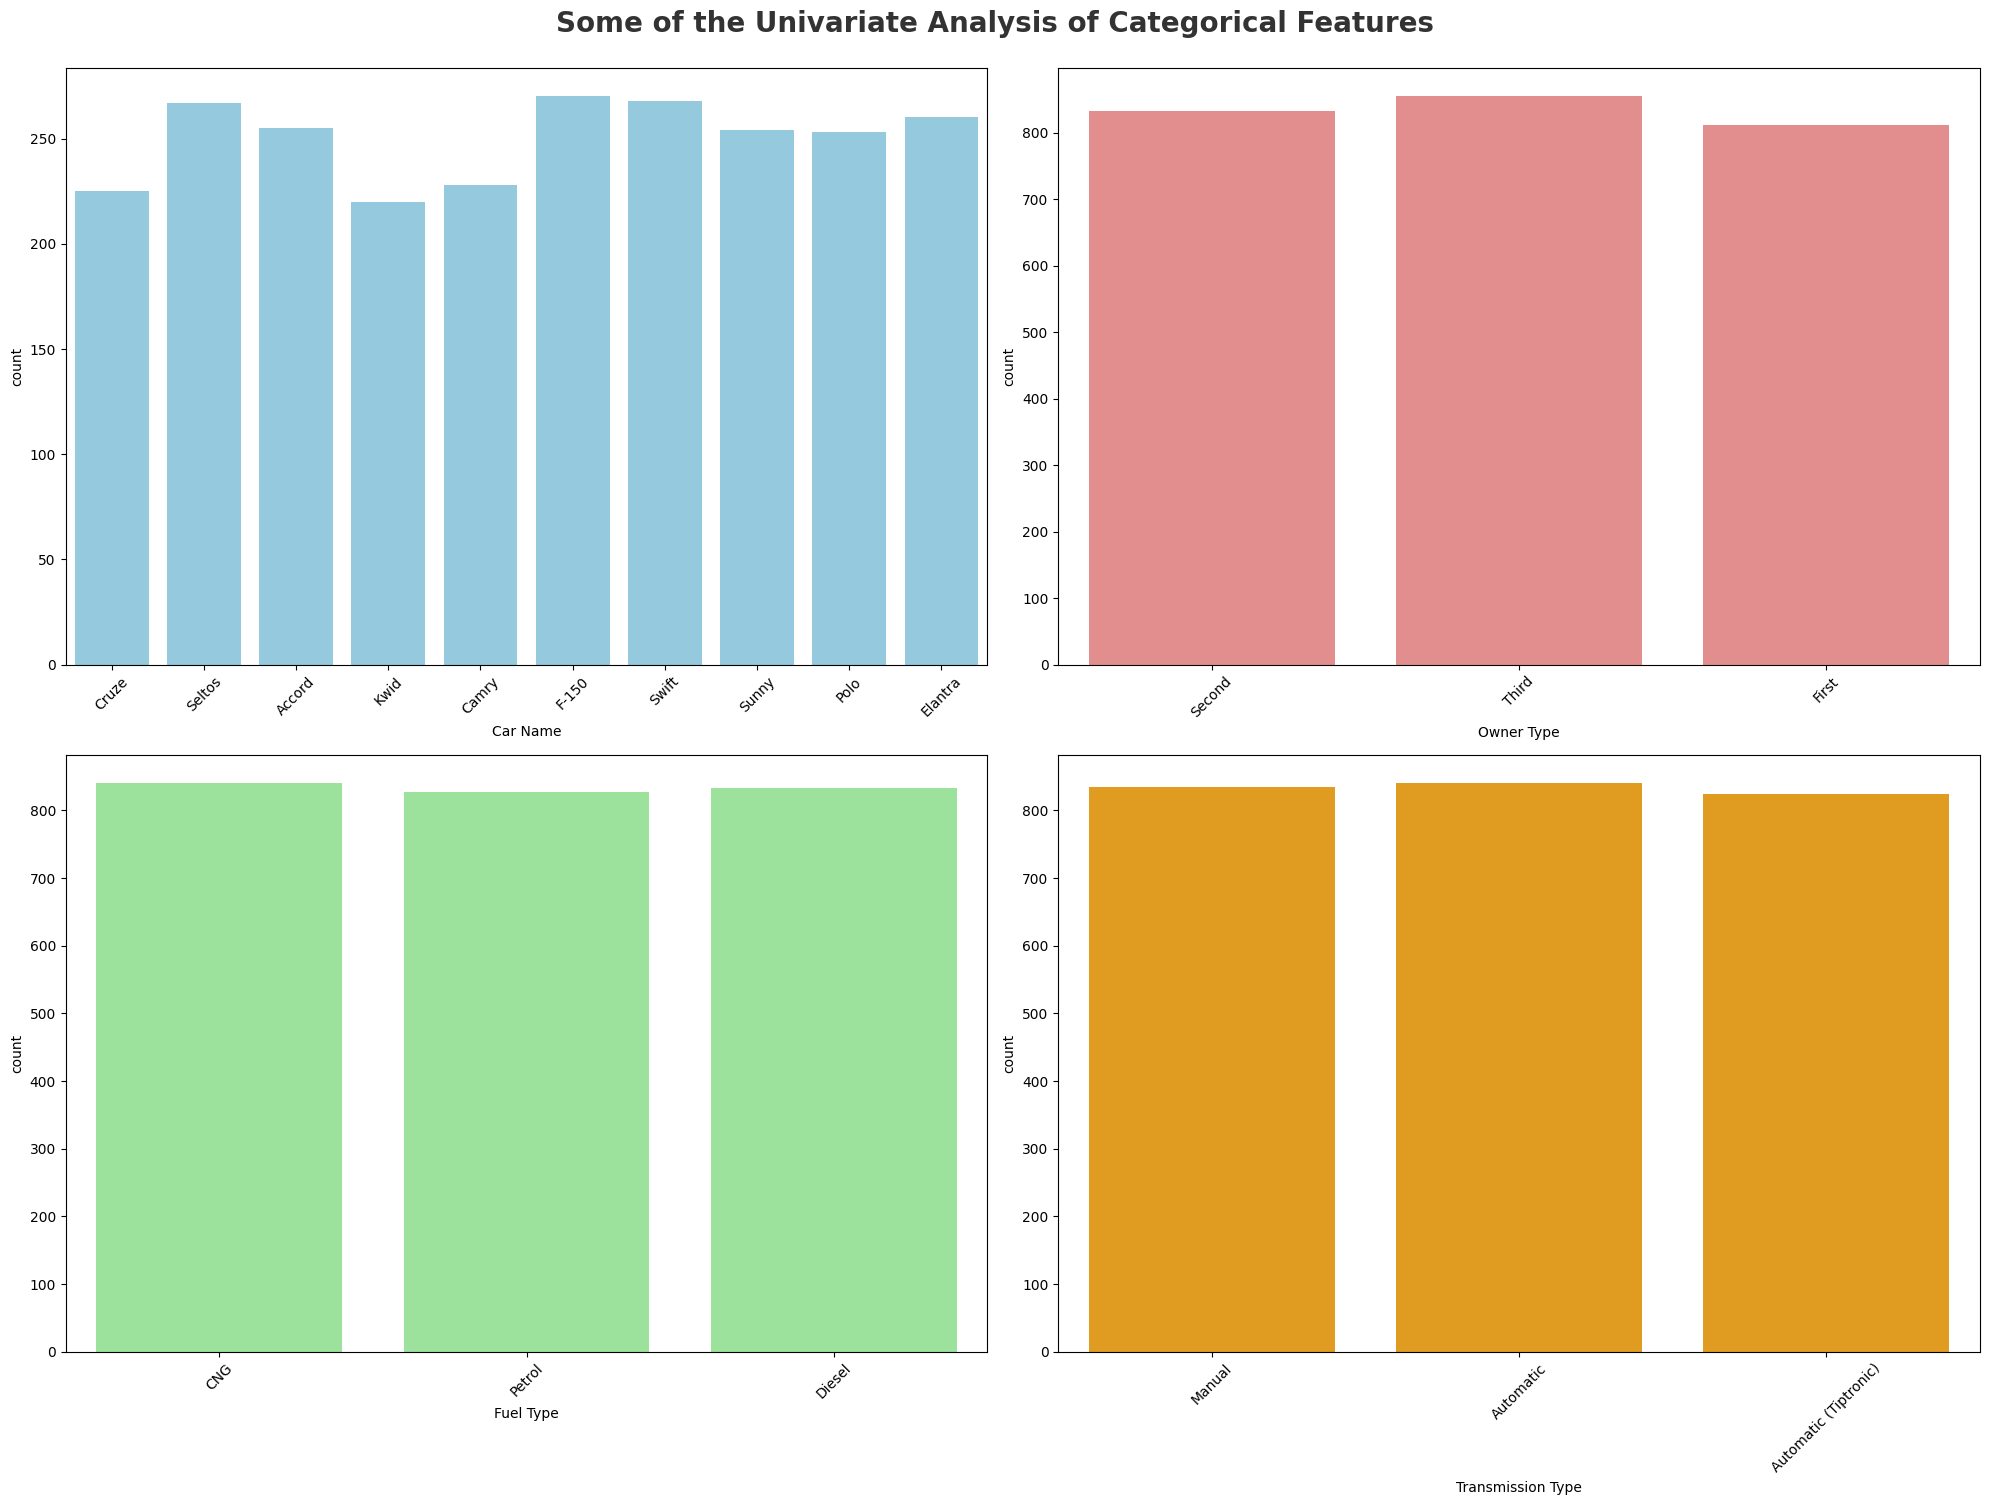

In [29]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Some of the Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Car Name', 'Owner Type', 'Fuel Type', 'Transmission Type']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']  # Define a list of colors
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=sec_hand_cars[cat1[i]], color=colors[i])  # Use colors from the list
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Figure size 1500x4000 with 0 Axes>

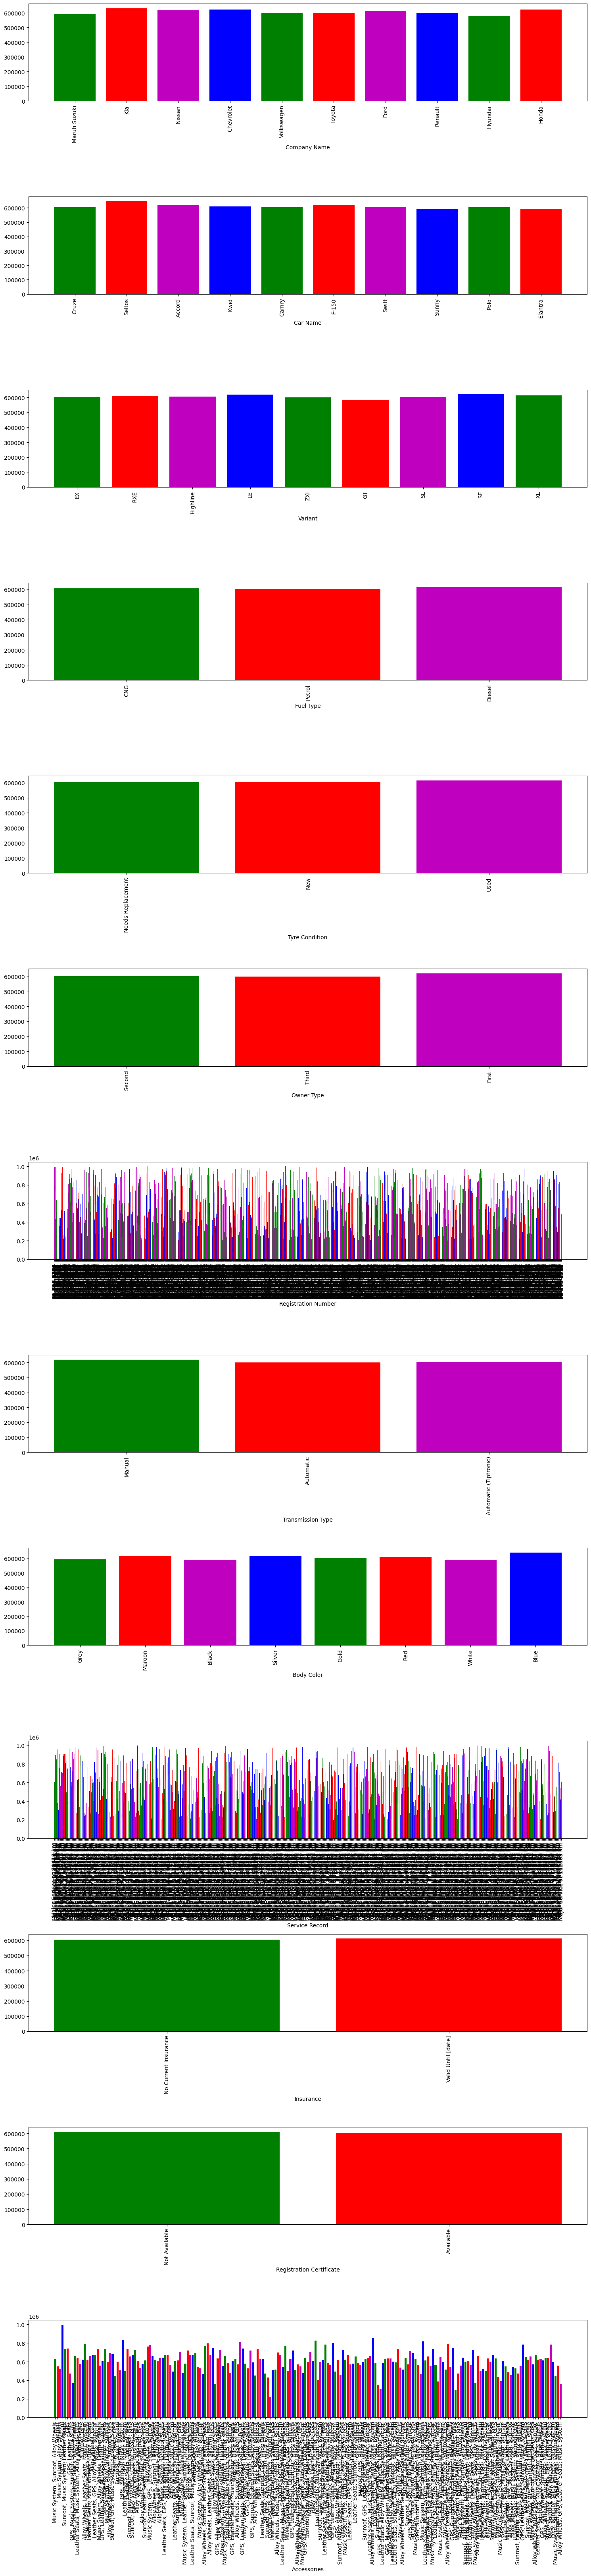

In [40]:
plt.figure(figsize=(15, 40))
colors = ['g', 'r', 'm', 'b']
# Calculate the number of rows needed for subplots based on categorical features
num_rows = len(categorical_features)

# Adjust the figure size to accommodate more subplots if needed
plt.figure(figsize=(15, 5 * num_rows))

for i in range(0, len(categorical_features)):
    # Create subplots with dynamic row count
    plt.subplot(num_rows, 1, i+1)
    cat_list = sec_hand_cars[categorical_features[i]].unique()
    # Changed to include numeric_only=True to avoid the error
    cat_average = sec_hand_cars.groupby(categorical_features[i])['Price'].mean(numeric_only=True)
    plt.bar(cat_list, cat_average, color=colors)
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
plt.tight_layout()

In [41]:
continuous_features=[feature for feature in numeric_features if len(sec_hand_cars[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['Mileage', 'Price']


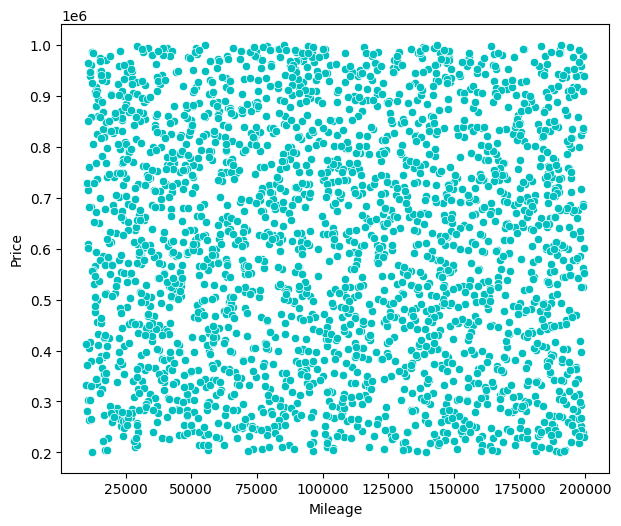

In [42]:
fig = plt.figure(figsize=(12, 10))

for i in range(0, len(continuous_features)):
    if continuous_features[i] != 'Price':
        ax = plt.subplot(2, 2, i+1)
        sns.scatterplot(data= sec_hand_cars ,y='Price', x=continuous_features[i], color='c')
        plt.tight_layout()

Target Feature

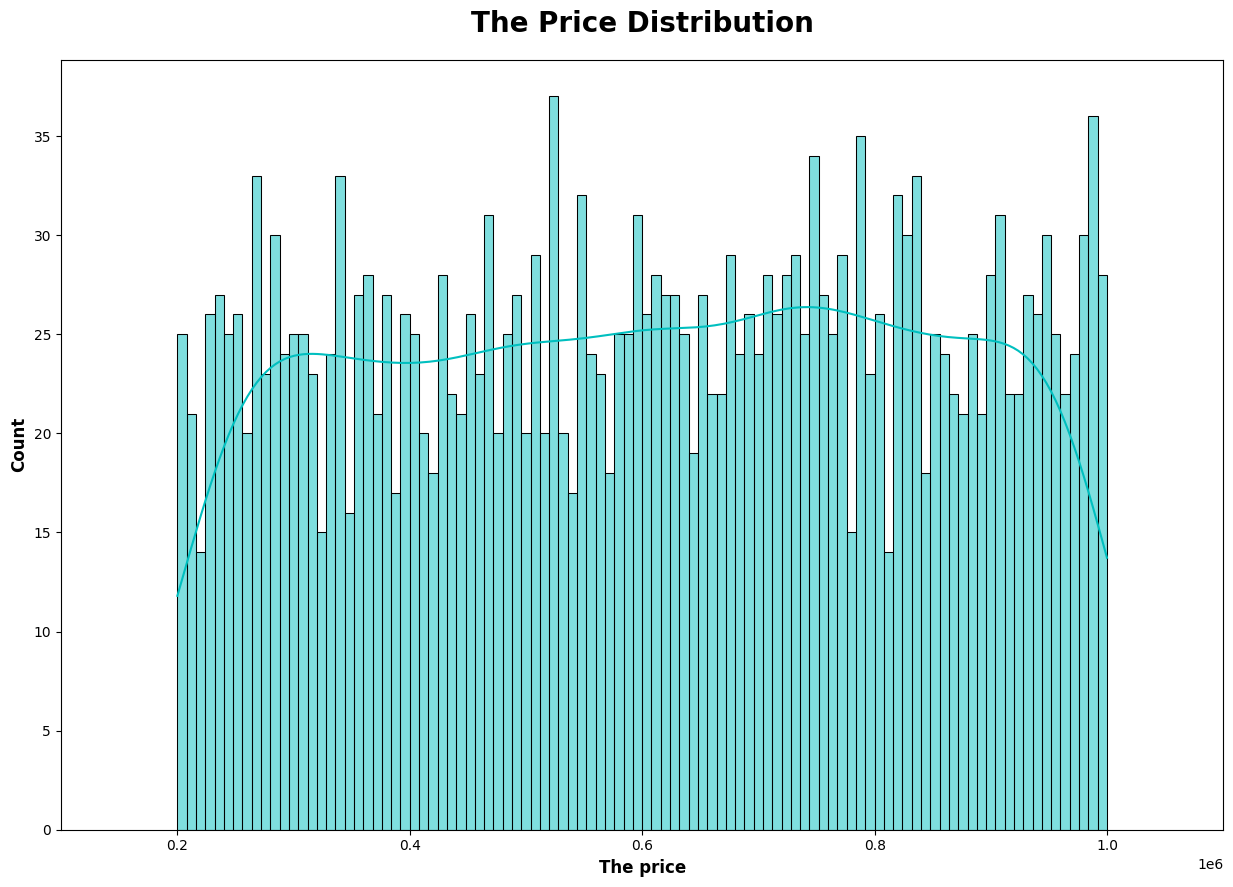

In [50]:
plt.subplots(figsize=(15,10))
sns.histplot(sec_hand_cars.Price, bins=100, kde=True, color = 'c')
plt.title("The Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("The price", weight="bold", fontsize=12)
plt.xlim(100000,1100000)
plt.show()

The target variable is normally distributed

Most Selling Variant of the Car Order

In [59]:
sec_hand_cars['Variant'].value_counts()[0:]

,count
Variant,
LE,532
GT,261
RXE,255
Highline,254
SE,250
ZXI,245
EX,241
XL,234
SL,228


The most selling variant of the used cars is LE

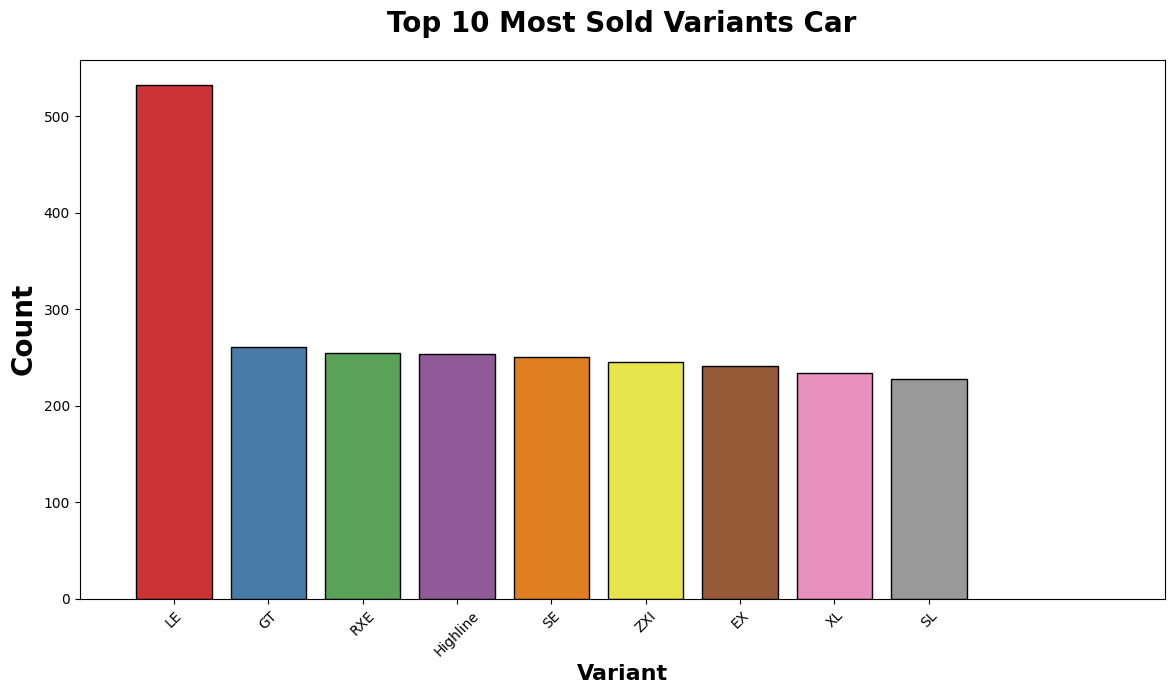

In [62]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Variant", data=sec_hand_cars,ec = "black",palette="Set1",order = sec_hand_cars['Variant'].value_counts().index)
plt.title("Top 10 Most Sold Variants Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Variant", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

The Most Expensive Second Hand Car

In [64]:
car= sec_hand_cars.groupby('Car Name').Price.max()
car =car.to_frame().sort_values('Price',ascending=False)[0:10]
car

,Price
Car Name,
Elantra,999826
Kwid,999597
Seltos,999319
F-150,998416
Accord,997807
Cruze,995700
Camry,995241
Polo,994339
Swift,994230


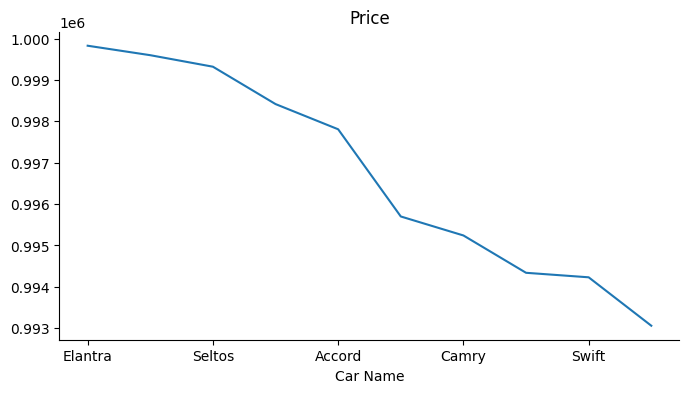

In [66]:
from matplotlib import pyplot as plt
car['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

The most expensive car sold is Elantra followed by Seltos

In [69]:
mileage= sec_hand_cars.groupby('Car Name')['Mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,Mileage
Car Name,
Accord,112293.886275
Polo,108728.079051
Camry,106192.083333
Seltos,105545.925094
Elantra,104825.153846
Swift,104357.167910
Cruze,102099.928889
Kwid,101956.854545
F-150,101446.503704


Accord gives the highest mileage while Sunny has the lowest mileage

In [71]:
sec_hand_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

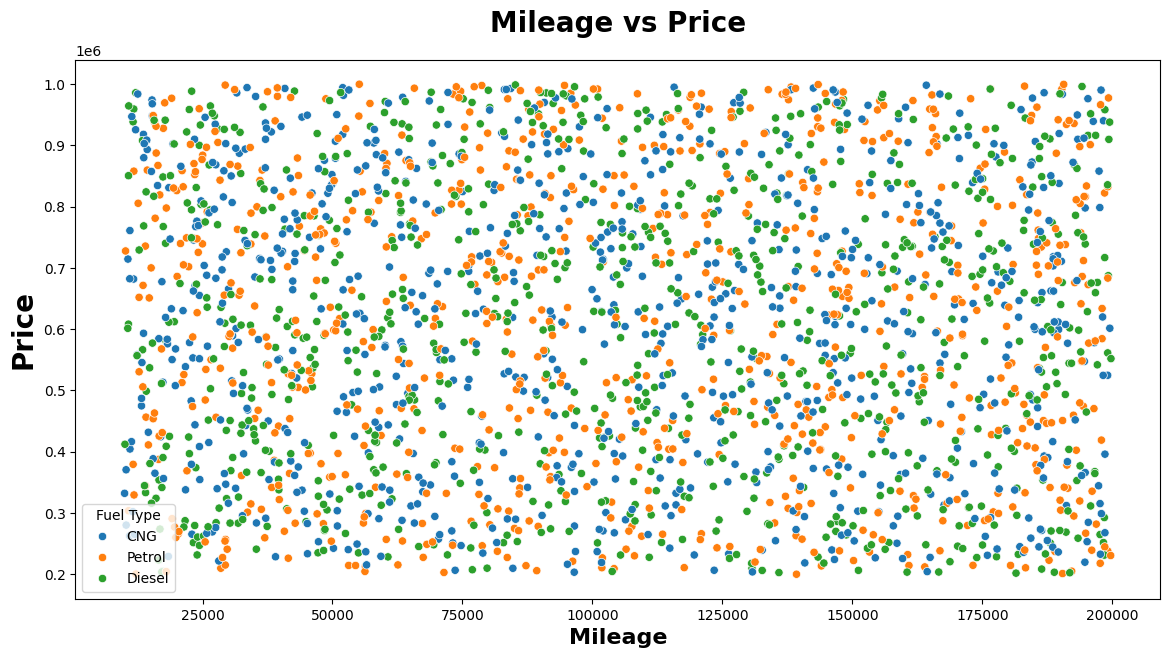

In [75]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Mileage", y='Price', data=sec_hand_cars,ec = "white",color='c', hue='Fuel Type')
plt.title("Mileage vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=20)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

In [76]:
fuel = sec_hand_cars.groupby('Fuel Type')['Price'].median().sort_values(ascending=False)
fuel.to_frame()

,Price
Fuel Type,
Petrol,622912.0
CNG,618276.0
Diesel,601477.0


Transformation

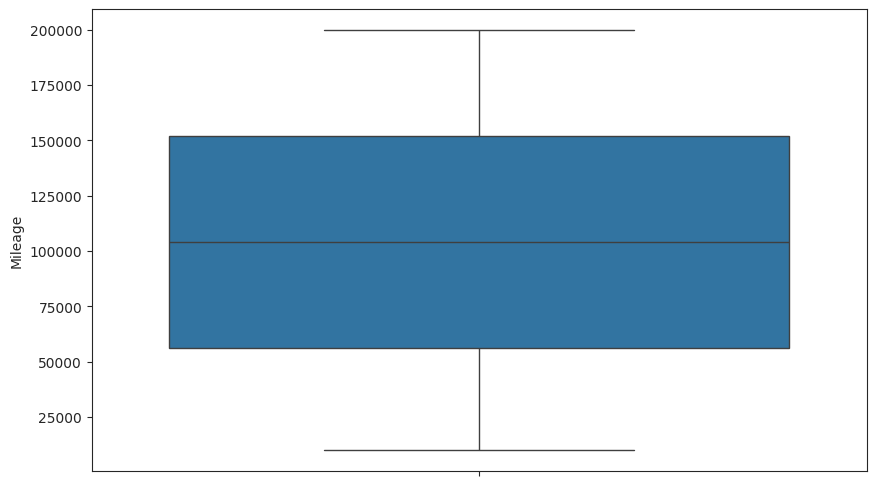

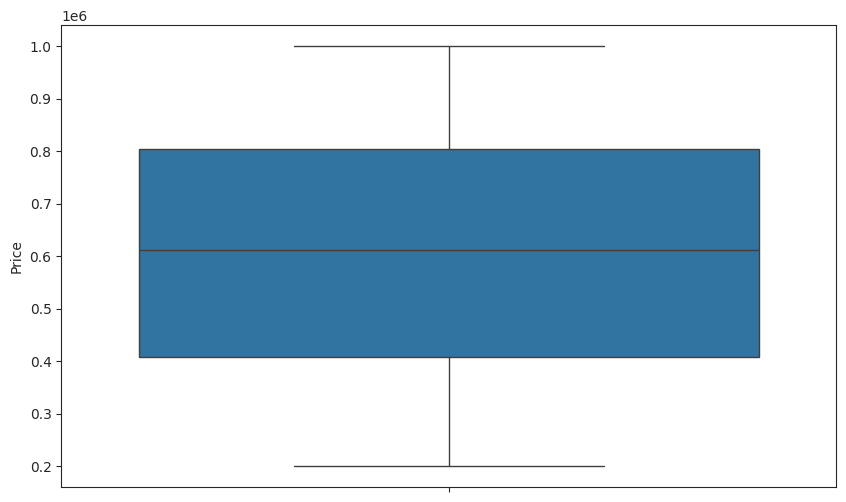

In [78]:
for i in continuous_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(sec_hand_cars[i])

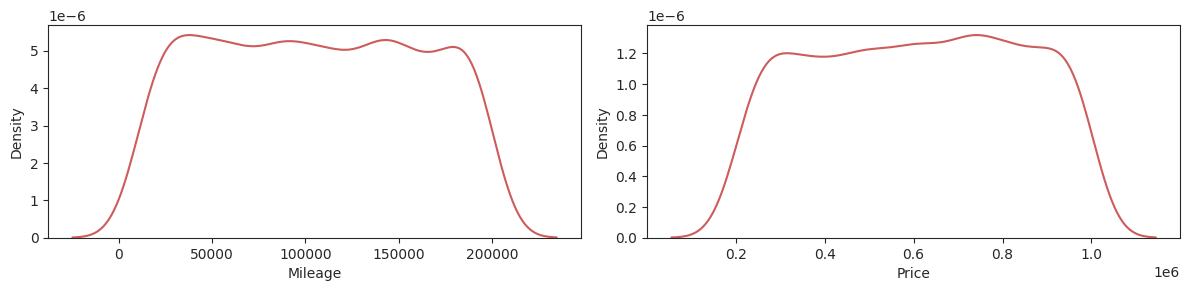

In [82]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Mileage','Price']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=sec_hand_cars[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [84]:
from sklearn.model_selection import train_test_split
X = sec_hand_cars.drop(['Price'], axis=1)
y = sec_hand_cars['Price']

In [86]:
categorical_features = [feature for feature in sec_hand_cars.columns if sec_hand_cars[feature].dtype == 'O']
X = sec_hand_cars.drop(['Price'], axis=1)
y = sec_hand_cars['Price']

# Iterate through the categorical_features list
for feature in categorical_features:
    print(feature, ':', X[feature].nunique())

Company Name : 10
Car Name : 10
Variant : 9
Fuel Type : 3
Tyre Condition : 3
Owner Type : 3
Registration Number : 2500
Transmission Type : 3
Body Color : 8
Service Record : 849
Insurance : 2
Registration Certificate : 2
Accessories : 203


In [90]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square